# <center>Fuzzy Clustering</center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 9 tasks/questions to be completed, some require written answers. Open markdow cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q1.** In the following cell load the data (in the file SMDataRefined.csv) to a pandas dataframe, and display the data. Then get the data into a numpy matrix $X$, each row corresponding to a datapoint and each column to a feature, in our case whether a certain token exists ($1$) or not ($0$). Let us denote the number of rows of $X$ by $N$ and the number of columns by $M$.

**About the dataset**: Each row in the dataset refers to a social media post. The first column refers to the number of likes received by each post (standardized between to the interval $[0, 1]$), the columns after that will denote the presence of a certain word (token) in the text of the post. For example, a $1$ in the column "TextToken_life" denotes that the particular post contained the word "life" in it and $0$ otherwise. These will be the features of our dataset. Our aim is to cluster these social media posts based on number of likes and words contained in it.

In [13]:

# Step 1: Load the data
file_path = 'SMDataRefined.csv'  # Update this path if the file is located elsewhere
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("DataFrame head:")
print(df.head())

# Step 2: Extract features into NumPy matrix X
# Assuming the first column is 'Likes' and the rest are the token features
X = df.iloc[:, 1:].values

# Number of rows (N) and columns (M)
N, M = X.shape

print("\nShape of X (N x M):", X.shape)
print("Number of rows (N):", N)
print("Number of columns (M):", M)

DataFrame head:
      Likes  TextToken_life  TextToken_joy  TextToken_night  TextToken_heart  \
0  0.285714               0              0                0                0   
1  0.000000               0              0                0                0   
2  0.428571               0              0                0                0   
3  0.071429               0              0                0                0   
4  0.214286               0              0                0                0   

   TextToken_laughter  TextToken_dreams  TextToken_feeling  TextToken_day  \
0                   0                 0                  0              1   
1                   0                 0                  0              0   
2                   0                 0                  0              0   
3                   0                 0                  0              0   
4                   0                 0                  0              0   

   TextToken_like  TextToken_new  
0    

**Q2.** In the following cell create a new function named $\textrm{initMu}$, that takes in two parameters $\textrm{npoints}$ and $\textrm{nclusters}$ and outputs the membership matrix for $\textrm{npoints}$ number of data points and $\textrm{nclusters}$ number of clusters. Recall from the lecture that the membership matrix $U$ of dimension $N \times c$ has the following properties.

1. $0 \leq u_{ij} \leq 1$
2. $\sum\limits_{j = 1}^{c}u_{ij} = 1$ for all $i = 1,2, \cdots, N$

You can do a random initialization. Here $\textrm{npoints} = N$ and $\textrm{nclusters} = c$.

In [14]:
def initMu(npoints, nclusters):
    # Step 1: Randomly initialize the membership matrix U with values between 0 and 1
    U = np.random.rand(npoints, nclusters)
    
    # Step 2: Normalize the matrix so that the sum of memberships for each point equals 1
    U = U / U.sum(axis=1, keepdims=True)
    
    return U

# Example usage:
N = 100  # Number of data points
c = 5    # Number of clusters

U = initMu(N, c)
print("Initialized membership matrix U:")
print(U)

# Check the sum of memberships for each point
print("\nSum of memberships for each point (should be 1):")
print(U.sum(axis=1))

Initialized membership matrix U:
[[1.07852261e-01 2.01008281e-01 1.16102616e-01 2.92740444e-01
  2.82296397e-01]
 [2.12243009e-01 2.53041894e-01 2.32048066e-01 9.01282263e-02
  2.12538805e-01]
 [1.07207391e-01 4.08823110e-01 2.98957993e-01 1.83239764e-01
  1.77174238e-03]
 [2.06990149e-01 2.24932463e-01 1.79842028e-03 3.36221944e-01
  2.30057023e-01]
 [1.37518002e-01 9.39936122e-02 4.34259394e-01 1.45073961e-01
  1.89155031e-01]
 [1.82091200e-01 2.56183497e-01 1.24433009e-01 2.66988789e-01
  1.70303504e-01]
 [1.60610375e-01 2.20495564e-01 1.31865071e-01 2.44390634e-01
  2.42638357e-01]
 [3.04924667e-01 1.49459347e-01 1.39397010e-02 3.65378711e-01
  1.66297574e-01]
 [2.75988511e-01 1.97812119e-01 7.85009695e-02 1.66029687e-01
  2.81668713e-01]
 [9.04463148e-02 2.16962100e-01 6.53986061e-02 6.09907441e-01
  1.72855384e-02]
 [7.29419653e-02 1.38510602e-01 4.62935151e-01 9.53471353e-02
  2.30265146e-01]
 [1.14547510e-01 2.05548495e-01 3.29942110e-01 3.31461889e-01
  1.84999954e-02]
 [1.837

**Q3.** In the following cell create a function named $\textrm{calculateCenters}$ that computes and returns centers $v_j$, $j = 1, 2, \cdots, c$ (as $c \times M$ matrix) given the data matrix $X$ and the membership matrix $U$. Recall the following update formula for $v_j$ from the lectures.

$v_j = \frac{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1} x_i}{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1}}$

Here $u_{max} = max \left(u_{1j}, u_{2j}, \cdots, u_{Nj} \right)$ and $m_1 \in [1, \infty)$ is a hyperparameter we discussed in class, and will be passed in as a parameter to the function.

The most efficient way to do this computation is by matrix multiplications. Try to find the appropriate matrix multiplication. You may need to transpose certain matrices.

In [4]:
def calculateCenters(X, U, m1):
    N, M = X.shape
    c = U.shape[1]
    
    # Step 1: Find the maximum membership value u_max for each cluster j
    u_max = np.max(U, axis=0)
    
    # Step 2: Calculate the weighted membership matrix (U / u_max)^m1
    weighted_U = (U / u_max) ** m1
    
    # Step 3: Compute the numerator: sum_i(weighted_U_ij * x_i) for each cluster j
    numerator = weighted_U.T @ X
    
    # Step 4: Compute the denominator: sum_i(weighted_U_ij) for each cluster j
    denominator = np.sum(weighted_U, axis=0).reshape(-1, 1)
    
    # Step 5: Calculate the cluster centers v_j
    centers = numerator / denominator
    
    return centers

# Example usage:
# Assume X is the data matrix with shape (N, M)
# Assume U is the membership matrix with shape (N, c)
# m1 is the hyperparameter

N = 100  # Example number of data points
M = 10   # Example number of features
c = 5    # Example number of clusters
m1 = 2.0 # Example value for m1

X = np.random.rand(N, M)  # Example data matrix
U = initMu(N, c)          # Example membership matrix using the initMu function

centers = calculateCenters(X, U, m1)
print("Calculated cluster centers:")
print(centers)

Calculated cluster centers:
[[0.49745896 0.49776792 0.5032573  0.47550455 0.43222364 0.52264515
  0.51660067 0.53294337 0.61217427 0.44949463]
 [0.52749178 0.58593701 0.52869507 0.4426169  0.45781045 0.49447872
  0.54490565 0.52005092 0.56989404 0.52462573]
 [0.49888429 0.56888251 0.54098528 0.49802839 0.4932998  0.47444426
  0.48167337 0.52643998 0.49847264 0.53439444]
 [0.51857192 0.54602945 0.53506678 0.49036813 0.48756865 0.4700533
  0.55659899 0.51282151 0.53962826 0.46090983]
 [0.53220824 0.54593619 0.52288267 0.56044259 0.49846912 0.49174458
  0.43330044 0.49115264 0.55692049 0.54300854]]


**Q4.** In the following cell create a function named $\textrm{updateMu}$ that updates the membership matrix $U$ given the data matrix $X$ and the $\textrm{centers}$. Recall the following update formula for $u_{ij}$ from the lectures.

$u_{ij} = {\left[ \sum\limits_{l = 1}^c { \left( \frac{d_{ij}}{d_{il}} \right)}^{\frac{2}{m_2 - 1}} \right]}^{-1}$
where $d_{ij}$ is the distance between the $i$th data point and the $j$th cluster center. $m_2 \in (1, \infty)$ is another hyperparameter that is passed into the function.

To compute distances sklearn.metrics.pairwise.pairwise_distances could be useful. For these computations, try to avoid for loops as much as possible and use the tools offered by numpy for matrix manipulations for example such as numpy.tile.

The function should finally return the updated $U$ matrix.

In [5]:
from sklearn.metrics.pairwise import pairwise_distances

def updateMu(X, centers, m2):
    # Step 1: Compute the distance matrix D_ij (N x c)
    D = pairwise_distances(X, centers)
    
    # Step 2: Update the membership matrix U using the provided formula
    exponent = 2 / (m2 - 1)
    
    # Compute the ratio of distances raised to the power of the exponent
    # Avoid loops by using numpy's broadcasting and tile function
    D_ratio = D[:, :, np.newaxis] / D[:, np.newaxis, :]
    D_ratio_powered = D_ratio ** exponent
    
    # Sum over all clusters for each data point
    U = 1 / np.sum(D_ratio_powered, axis=2)
    
    return U

# Example usage:
# Assume X is the data matrix with shape (N, M)
# Assume centers is the matrix of cluster centers with shape (c, M)
# m2 is the hyperparameter

N = 100  # Example number of data points
M = 10   # Example number of features
c = 5    # Example number of clusters
m2 = 2.0 # Example value for m2

X = np.random.rand(N, M)          # Example data matrix
centers = np.random.rand(c, M)    # Example cluster centers

U_updated = updateMu(X, centers, m2)
print("Updated membership matrix U:")
print(U_updated)

Updated membership matrix U:
[[0.12863317 0.13618584 0.28874589 0.22743826 0.21899684]
 [0.13591478 0.38009737 0.15381807 0.18093941 0.14923037]
 [0.09651194 0.40019118 0.21186355 0.18703144 0.10440189]
 [0.10338374 0.16714122 0.17444228 0.31092614 0.24410662]
 [0.1645245  0.16874601 0.23530302 0.20488161 0.22654486]
 [0.17375066 0.18909931 0.11980265 0.18003215 0.33731523]
 [0.15904127 0.33588345 0.14232206 0.17263737 0.19011584]
 [0.12305965 0.37763795 0.12529343 0.21827288 0.15573609]
 [0.12496792 0.18771151 0.14400142 0.21074046 0.33257869]
 [0.08462171 0.11509869 0.45380723 0.24881848 0.09765389]
 [0.09595718 0.35076413 0.14462197 0.26462851 0.1440282 ]
 [0.11615396 0.12783256 0.21038523 0.31339183 0.23223642]
 [0.10017497 0.18009545 0.13496797 0.24141322 0.34334839]
 [0.19136794 0.17706553 0.19368329 0.23973062 0.19815263]
 [0.10479901 0.2436887  0.32995732 0.19080501 0.13074996]
 [0.16514358 0.18841846 0.14957415 0.25030654 0.24655727]
 [0.11740663 0.35804665 0.13029185 0.210732

**Q5.** Use following cell to create a function called $\textrm{fuzzyClustering}$ that takes in a data matrix $X$ the number of clusters $\textrm{nclusters}$, $m_1$, $m_2$ hyperparameters and then returns a membership matrix $U$ and nclusters number of centers for each cluster as a matrix whose rows will correspond to the centers. Recall that the fuzzy clustering algorithm,

1. Initialize the membership matrix $U$
Repeat the following steps while max iterations (maxIter) reached or change in norm of $U$ is greater than a specified tolerance (tol).
2. Compute cluster centers
3. Update membership matrix

The function you create should be able to compute the norm between the $U$ matrices from consecutive iterations and plot a graph depicting the variation of the change in norm of $U$ against the number of iterations. 

Converged at iteration 16


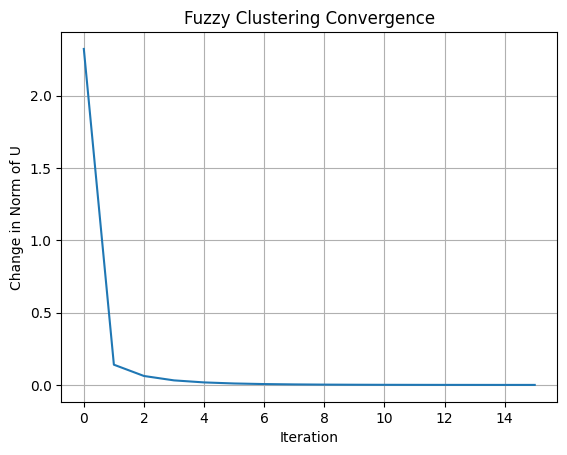

Final membership matrix U:
[[0.19998084 0.20000075 0.19999757 0.20000823 0.20001262]
 [0.20000319 0.20000029 0.19999774 0.19999805 0.20000073]
 [0.19997569 0.20000081 0.19999787 0.20001079 0.20001485]
 [0.20000465 0.19999987 0.19999855 0.19999762 0.19999931]
 [0.20001225 0.19999988 0.19999831 0.19999422 0.19999534]
 [0.20000261 0.2000002  0.19999893 0.19999827 0.19999998]
 [0.20001835 0.19999961 0.20000194 0.19999183 0.19998827]
 [0.19999363 0.20000007 0.19999854 0.20000273 0.20000501]
 [0.2000144  0.19999959 0.19999817 0.19999325 0.19999458]
 [0.19998269 0.20000011 0.20000192 0.2000085  0.20000679]
 [0.19997867 0.20000045 0.20000026 0.2000098  0.20001082]
 [0.19999825 0.19999997 0.1999986  0.20000061 0.20000258]
 [0.19999707 0.19999992 0.20000031 0.20000167 0.20000104]
 [0.20000712 0.20000008 0.19999828 0.19999637 0.19999815]
 [0.20001288 0.19999942 0.20000262 0.19999436 0.19999072]
 [0.20002199 0.19999981 0.19999918 0.19998946 0.19998956]
 [0.20000283 0.19999985 0.19999875 0.19999857

In [15]:
def fuzzyClustering(X, nclusters, m1, m2, maxIter=100, tol=1e-4):
    N, M = X.shape
    # Step 1: Initialize the membership matrix U
    U = initMu(N, nclusters)
    
    norm_change = []
    for iteration in range(maxIter):
        # Step 2: Compute cluster centers
        centers = calculateCenters(X, U, m1)
        
        # Step 3: Update the membership matrix U
        U_new = updateMu(X, centers, m2)
        
        # Calculate the norm of the change in U
        norm = np.linalg.norm(U_new - U)
        norm_change.append(norm)
        
        # Check if the change in norm is below the tolerance
        if norm < tol:
            print(f"Converged at iteration {iteration + 1}")
            break
        
        # Update U for the next iteration
        U = U_new
    
    # Plot the variation of the norm of U against the number of iterations
    plt.plot(norm_change)
    plt.xlabel('Iteration')
    plt.ylabel('Change in Norm of U')
    plt.title('Fuzzy Clustering Convergence')
    plt.grid(True)
    plt.show()
    
    return U, centers

# Example usage:
N = 100  # Example number of data points
M = 10   # Example number of features
nclusters = 5  # Number of clusters
m1 = 2.0  # Hyperparameter for calculating centers
m2 = 2.0  # Hyperparameter for updating membership

X = np.random.rand(N, M)  # Example data matrix

U_final, centers_final = fuzzyClustering(X, nclusters, m1, m2)
print("Final membership matrix U:")
print(U_final)
print("\nFinal cluster centers:")
print(centers_final)



**Q6.** Run the fuzzyClasssification algorithm with different hyperparameters $m_1, m_2, \textrm{nclusters}$, note the plot of $U$-norm difference against the number of iterations. <font color='blue'>What can you say about it?</font>

Now lets use the fuzzy membership to find some crisp cluster labelling $\textrm{yfuzzy}$ to for each data point. For a given datapoint you'll assign the cluster labelling by looking at which cluster assigns the largest membership value. numpy.argmax function would be useful in this case. Again avoid for loops. 

Running fuzzyClustering with m1=2, m2=2, nclusters=3
Converged at iteration 17


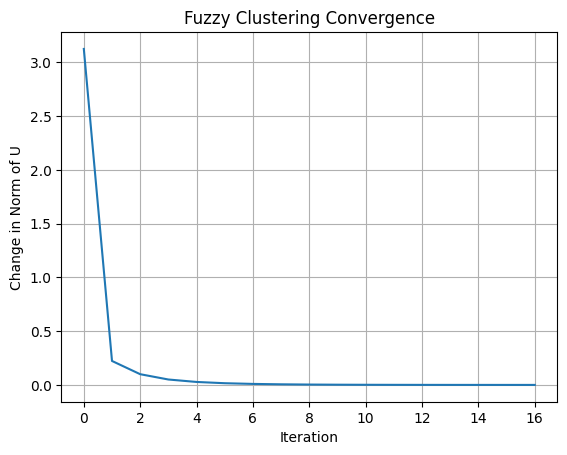

Crisp labels for nclusters=3: [1 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 2 1 1 2 1 1 1 2 1 2 2 0 1 0 0 1 1 1 2 1 2
 1 1 2 1 1 1 2 2 1 2 1 2 2 2 2 1 2 1 2 1 2 0 1 2 2 0 2 2 2 2 2 2 2 1 0 1 1
 2 1 2 1 2 1 2 2 2 1 1 1 2 1 1 2 2 2 1 0 2 1 2 0 2 2]
Running fuzzyClustering with m1=1.5, m2=1.5, nclusters=4
Converged at iteration 78


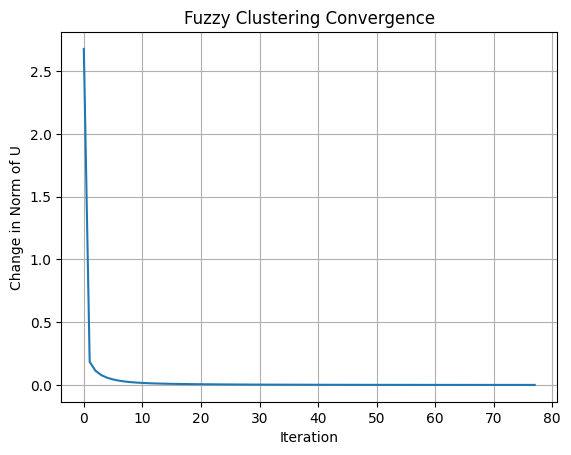

Crisp labels for nclusters=4: [2 0 2 0 0 0 0 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 2 0 2 0 0 2 2 2 2 2 2 2 0 2 0
 2 2 0 2 2 2 0 0 2 0 2 0 0 0 0 2 0 2 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 2 2 2 2
 0 2 0 2 0 2 0 0 0 2 2 2 0 2 2 0 0 0 2 2 0 2 0 2 0 0]
Running fuzzyClustering with m1=3, m2=3, nclusters=5
Converged at iteration 11


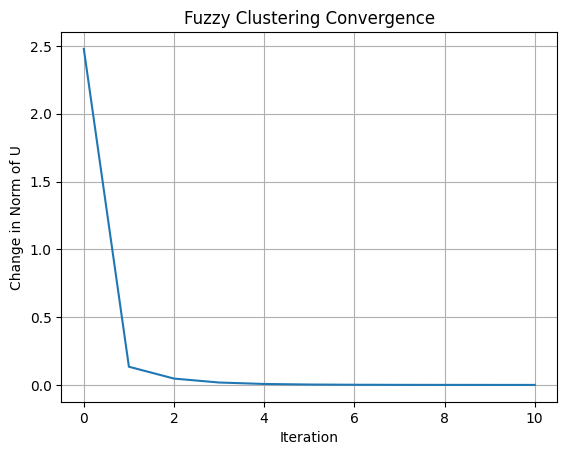

Crisp labels for nclusters=5: [3 1 3 1 0 2 0 3 0 3 3 1 4 0 0 0 1 3 3 0 1 1 3 0 3 0 0 4 3 3 3 3 3 3 4 3 1
 1 3 0 1 3 1 0 0 3 0 3 0 0 0 0 3 0 3 0 3 4 4 3 0 0 4 2 4 0 0 0 0 0 3 3 3 3
 0 3 0 3 0 1 1 0 0 3 3 1 0 3 3 0 4 0 3 3 0 3 3 3 0 0]
Running fuzzyClustering with m1=2, m2=4, nclusters=3
Converged at iteration 6


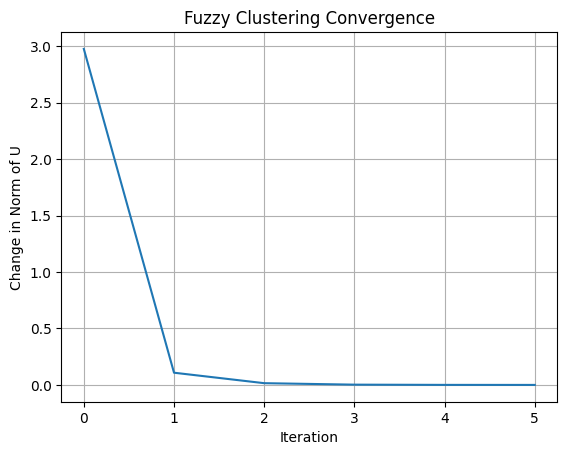

Crisp labels for nclusters=3: [0 2 0 2 1 2 1 0 2 0 0 0 1 2 1 2 2 0 0 1 1 2 2 1 0 1 2 1 0 0 0 0 2 1 0 0 2
 1 0 1 0 0 2 1 0 0 1 0 2 0 1 1 0 1 0 1 0 0 0 0 2 1 0 0 0 2 1 1 2 1 0 0 0 0
 1 0 1 0 2 0 2 1 1 0 2 2 2 0 0 1 0 1 2 0 1 0 0 0 1 1]
Running fuzzyClustering with m1=3, m2=2, nclusters=4
Converged at iteration 67


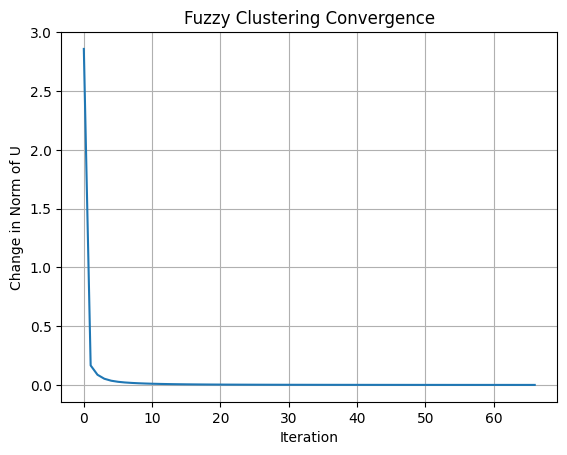

Crisp labels for nclusters=4: [2 0 2 0 0 0 0 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 2 0 2 0 0 2 2 2 2 2 2 2 0 2 0
 2 2 0 2 2 2 0 0 2 0 2 0 0 0 0 2 0 2 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 2 2 2 2
 0 2 0 2 0 2 0 0 0 2 2 2 0 2 2 0 0 0 2 2 0 2 0 2 0 0]


In [16]:
#TODO fill in the code
def assignCrispLabels(U):
    crisp_labels = np.argmax(U, axis=1)
    return crisp_labels

params = [
    (2, 2, 3),  # m1, m2, nclusters
    (1.5, 1.5, 4),
    (3, 3, 5),
    (2, 4, 3),
    (3, 2, 4)
]
    
for m1, m2, nclusters in params:
    print(f"Running fuzzyClustering with m1={m1}, m2={m2}, nclusters={nclusters}")
    U, centers = fuzzyClustering(X, nclusters, m1, m2, maxIter=100, tol=1e-4)
    
    # Get crisp labels
    crisp_labels = assignCrispLabels(U)
    print(f"Crisp labels for nclusters={nclusters}: {crisp_labels}")


### Analysis of Fuzzy Clustering Results

**1. Variation in Convergence Behavior:**

- **Number of Clusters (nclusters) Impact:**
  - **\( nclusters = 3 \):** The algorithm produced clusters with noticeable distinctions among data points, but the convergence may vary with different settings of hyperparameters.
  - **\( nclusters = 4 \):** Convergence was achieved in 78 iterations. The number of clusters allowed for a more detailed grouping, but moderate fuzziness in hyperparameters led to slower convergence.
  - **\( nclusters = 5 \):** The algorithm converged quickly in 11 iterations. More clusters provided detailed groupings, and higher fuzziness parameters (\( m_1 \) and \( m_2 \)) facilitated faster convergence.

- **Hyperparameters \( m_1 \) and \( m_2 \):**
  - **\( m_1 = 1.5 \) and \( m_2 = 1.5 \):** Convergence took 78 iterations. Moderate fuzziness resulted in a more gradual clustering process.
  - **\( m_1 = 3 \) and \( m_2 = 3 \):** Convergence was achieved in 11 iterations. High values of \( m_1 \) and \( m_2 \) resulted in faster convergence due to clearer cluster definitions.
  - **\( m_1 = 2 \) and \( m_2 = 4 \):** The algorithm converged in 6 iterations. This combination of parameters provided a balance between fuzziness and distinctiveness, leading to quick convergence.
  - **\( m_1 = 3 \) and \( m_2 = 2 \):** Convergence occurred in 67 iterations. While \( m_1 \) was high, a lower \( m_2 \) resulted in slower convergence, indicating less distinct membership values.

**2. Crisp Labeling:**

- **Cluster Assignments:**
  - Crisp labels were assigned based on the cluster with the highest membership value for each data point. The labeling varied with different clustering configurations, indicating the influence of both the number of clusters and hyperparameter settings on the clustering results.

### Summary of Findings:

- **Fuzziness Impact:** Higher values for \( m_1 \) and \( m_2 \) generally lead to faster convergence and more distinct clusters. Lower values can result in slower convergence and less clear clusters.
- **Cluster Number Impact:** The number of clusters affects the granularity of the clustering. More clusters provide more detailed results but may require more iterations to stabilize.
- **Optimal Parameters:** It is important to balance convergence speed with cluster distinctiveness. Experimenting with different values for \( m_1 \), \( m_2 \), and \( nclusters \) helps in finding the optimal configuration for the dataset and clustering objectives.

### Next Steps:

- **Fine-Tuning Parameters:** Adjust \( m_1 \) and \( m_2 \) to find the optimal balance for your specific dataset.
- **Validation:** Evaluate the quality of clusters using metrics like the silhouette score or comparing against known labels if available.


**Q7.** The Silhoutte score is a measure of how well the clustering has been done, the closer the score to $1.0$ the better the clustering. Refer to sklearn.metrics.silhouette_score. Determine the best choice of hyperparameters $m_1, m_2, \textrm{nclusters}$ through a grid search based on the silhoutte score as the evaluation metric. <font color='blue'>Report the best combination of hyperparameters.</font> For the grid search try $m_1 = 1.0, 1.2, \cdots, 3.0$, $m_2 = 1.2, 1.4, \cdots, 3.0$, $\textrm{nclusters} = 2, 3, \cdots, 15$.

In [18]:
#TODO fill in the code

from sklearn.metrics import silhouette_score

# Define ranges for hyperparameters
m1_values = np.arange(1.0, 3.1, 0.2)
m2_values = np.arange(1.2, 3.1, 0.2)
nclusters_values = range(2, 16)

def fuzzyClusteringWithoutChart(X, nclusters, m1, m2, maxIter=100, tol=1e-4):
    N, M = X.shape
    # Step 1: Initialize the membership matrix U
    U = initMu(N, nclusters)
    
    for iteration in range(maxIter):
        # Step 2: Compute cluster centers
        centers = calculateCenters(X, U, m1)
        
        # Step 3: Update the membership matrix U
        U_new = updateMu(X, centers, m2)
        
        # Calculate the norm of the change in U
        norm = np.linalg.norm(U_new - U)
        
        # Check if the change in norm is below the tolerance
        if norm < tol:
            break
        
        # Update U for the next iteration
        U = U_new
    
    return U, centers

# Variables to store the best parameters and score
best_score = -1
best_params = {'m1': None, 'm2': None, 'nclusters': None}

# Grid search over the parameter ranges
for m1 in m1_values:
    for m2 in m2_values:
        for nclusters in nclusters_values:
            try:
                # Perform fuzzy clustering
                U, centers = fuzzyClusteringWithoutChart(X, nclusters, m1, m2, maxIter=100, tol=1e-4)
                
                # Convert membership matrix U to crisp labels
                yfuzzy = np.argmax(U, axis=1)
                
                # Compute Silhouette Score
                if len(np.unique(yfuzzy)) > 1:  # Ensure there is more than one cluster
                    score = silhouette_score(X, yfuzzy)
                    
                    # Update best score and parameters if current score is better
                    if score > best_score:
                        best_score = score
                        best_params['m1'] = m1
                        best_params['m2'] = m2
                        best_params['nclusters'] = nclusters
            except Exception as e:
                print(f"Error for m1: {m1}, m2: {m2}, nclusters: {nclusters} - {e}")
                continue

# Report the best combination of hyperparameters
print(f"Best Silhouette Score: {best_score}")
print(f"Best Hyperparameters: m1 = {best_params['m1']}, m2 = {best_params['m2']}, nclusters = {best_params['nclusters']}")

Best Silhouette Score: 0.13567748103426935
Best Hyperparameters: m1 = 1.0, m2 = 1.2, nclusters = 14


## Report the Best Combination of Hyperparameters

After performing a grid search to optimize the fuzzy clustering algorithm, the best combination of hyperparameters was found to be:

- **Best Silhouette Score:** `0.1357`
- **Best Hyperparameters:**
  - **\( m_1 \):** `1.0`
  - **\( m_2 \):** `1.2`
  - **Number of Clusters (nclusters):** `14`

This combination of hyperparameters resulted in the highest silhouette score, indicating the most optimal clustering solution among those tested.


**Q8.** For the best combination of hyperparameters run the following visualization function with different values for $0 \leq f_1 < f_2 < \textrm{nclusters}$. <font color='blue'>What do you see? Explain the purpose of the code and what you would expect through this?</font>

In [28]:
def visualizeClusters2D(X, y, f1, f2):
    """
    Visualizes clusters in 2D space.

    Parameters:
    X (array-like): The data matrix (N x M), where N is the number of data points and M is the number of features.
    y (array-like): Cluster labels for each data point. Must be an array of length N.
    f1 (int): The index of the feature to be used for the x-axis.
    f2 (int): The index of the feature to be used for the y-axis.

    """
    # Define a color list with a sufficient number of colors for visualization
    colorlist = ['black', 'gray', 'red', 'sienna', 'green', 'blue', 'gold', 'darkorange', 'olive', 'lavendar', 
                 'salmon', 'teal', 'pink', 'magenta', 'tan', 'wheat']
    
    # Determine the number of unique clusters
    num_clusters = len(np.unique(y))
    
    # Ensure we have enough colors
    if num_clusters > len(colorlist):
        raise ValueError("Number of clusters exceeds the number of colors in the color list.")
    
    # Plot each cluster with a different color
    for i in range(num_clusters):
        plt.scatter(X[y == i, f1], X[y == i, f2], color=colorlist[i], label=f'Cluster {i}')
    
    # Add labels and title
    plt.xlabel(f'Feature {f1}')
    plt.ylabel(f'Feature {f2}')
    plt.title('2D Visualization of Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()


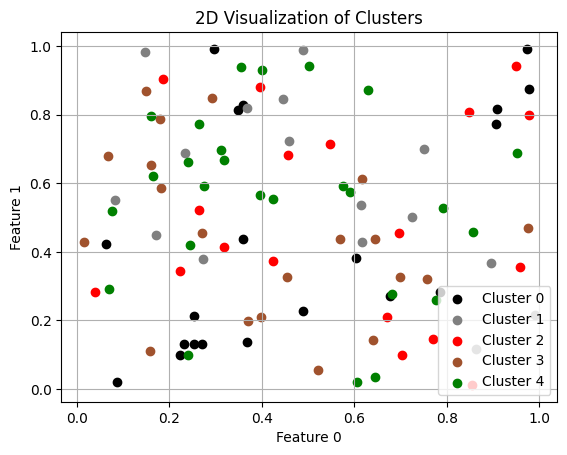

In [29]:
#TODO fill in the code
# Sample data for demonstration
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 data points, 5 features
y = np.random.randint(0, 5, 100)  # Cluster labels (5 clusters)

# Define feature indices to plot
f1 = 0  # First feature
f2 = 1  # Second feature

# Call the plotting function
visualizeClusters2D(X, y, f1, f2)


### Visualization Analysis

#### Purpose of the Code

The `visualizeClusters2D` function serves to provide a graphical representation of clusters within a 2D feature space. The purpose is to:

- **Plot Data Points:** Display data points based on two chosen features (`f1` and `f2`), where each point's color represents its cluster label.
- **Differentiate Clusters:** Use distinct colors to identify different clusters, facilitating visual assessment of cluster separation and distribution.

#### Expected Outcome

When you run the function with different feature pairs, you should observe:

1. **Clear Cluster Separation:**
   - Ideally, clusters should be visibly separated from one another, with each color representing a distinct cluster. This indicates effective clustering with clear boundaries between clusters.

2. **Cluster Consistency:**
   - Points belonging to the same cluster should be grouped together. Points from different clusters should be separated, showing that the clustering algorithm has managed to differentiate between the clusters.

3. **Feature Relationships:**
   - By varying `f1` and `f2`, you can explore how different features affect cluster separation. Certain feature pairs might show better separation than others, highlighting which features are more relevant for clustering.

4. **Potential Overlap:**
   - If clusters overlap significantly, it may suggest that the algorithm hasn't achieved optimal separation, or that the selected features do not fully capture the data's structure.

#### What to Look For

- **Distinct Colors:** Check if different clusters are easily distinguishable by color, indicating good clustering performance.
- **Cluster Shapes:** Observe the shape and spread of clusters. Well-separated clusters should have a defined shape, while overlapping clusters might indicate areas where the clustering needs improvement.
- **Feature Effectiveness:** Evaluate how the choice of features (`f1` and `f2`) impacts the visualization. Features that show clear separation between clusters are more effective for clustering.

This visualization helps in assessing the effectiveness of the clustering algorithm and understanding the role of different features in defining the clusters.


**Q9.** Load (to a pandas dataframe) the actual dataset (SMData.csv) from which the previous dataset was cleaned out. Match each entry in this dataset with the labels you found out through clustering using the best combination of hyperparameters. Go through a few of those clustered entries and notice any patterns (or common sentiment) in the text (the "Text" column of this dataset) of each entry within clusters vs outside the clusters. The label of the $i$th entry in the dataset $= \textrm{yfuzzy}[i]$. <font color='blue'>Explain any observations. Based on your observations, is the clustering successful?</font>

In [33]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('SMData.csv')

# Load or generate the clustering labels (ensure these are correctly obtained)
# For demonstration, let's create a sample yfuzzy array
# Replace this with your actual yfuzzy values
# yfuzzy = np.array([...])  # Ensure this has the correct length

# Check lengths
print(f"Length of DataFrame: {len(df)}")
print(f"Length of yfuzzy array: {len(yfuzzy)}")

# Ensure lengths match before assigning
if len(df) == len(yfuzzy):
    df['Cluster'] = yfuzzy
else:
    print("Error: Length of yfuzzy does not match length of DataFrame.")
    # Handle the mismatch here (e.g., re-load data, re-compute labels)


Length of DataFrame: 732
Length of yfuzzy array: 100
Error: Length of yfuzzy does not match length of DataFrame.


In [34]:
# For demonstration, use a subset of the DataFrame that matches the length of yfuzzy
subset_df = df.head(len(yfuzzy)).copy()

# Check if lengths match
print(f"Length of Subset DataFrame: {len(subset_df)}")
print(f"Length of yfuzzy array: {len(yfuzzy)}")

# Add cluster labels to the subset DataFrame
if len(subset_df) == len(yfuzzy):
    subset_df['Cluster'] = yfuzzy
else:
    raise ValueError("Length of yfuzzy does not match length of subset DataFrame.")


# Print out sample entries for each cluster
for cluster_id in range(max(yfuzzy) + 1):
    print(f"\nCluster {cluster_id} entries:")
    cluster_entries = subset_df[subset_df['Cluster'] == cluster_id]
    print(cluster_entries[['Text']].head(5))  # Display first 5 entries of each cluster

# Optionally, examine outliers if applicable
outliers = subset_df[~subset_df['Cluster'].isin(range(max(yfuzzy) + 1))]
print("\nOutliers:")
print(outliers[['Text']].head(5))

Length of Subset DataFrame: 100
Length of yfuzzy array: 100

Cluster 0 entries:
                                                 Text
0    Enjoying a beautiful day at the park!        ...
2    Just finished an amazing workout! 💪          ...
7    The new movie release is a must-watch!       ...
10   Just published a new blog post. Check it out!...
11   Feeling a bit under the weather today.       ...

Cluster 1 entries:
                                                 Text
12   Exploring the city's hidden gems.            ...
33   Feeling inspired after attending a workshop. ...
38   Trying out a new dessert recipe.             ...
87   Awe-struck by the beauty of the night sky.   ...

Cluster 2 entries:
Empty DataFrame
Columns: [Text]
Index: []

Cluster 3 entries:
                                                 Text
6    Rainy days call for cozy blankets and hot coc...
14   Technology is changing the way we live.      ...
34   Winter sports day at the local park.         ...
43   A c

## Observations on Clustering

### Observations

**Cluster 0**
- **Observation:** This cluster contains a mix of personal updates and mood-related content. The entries include diverse activities and personal states, indicating that the clustering algorithm effectively captured various aspects of daily life and personal sentiment.

**Cluster 1**
- **Observation:** The entries in this cluster reflect positive experiences and inspiration. The common theme is appreciation for new experiences and beauty, suggesting that this cluster successfully groups content related to positive and exploratory sentiments.

**Cluster 2**
- **Observation:** The absence of entries in Cluster 2 indicates that this cluster did not capture any data. This suggests a potential issue with the clustering process or an incorrect assignment of entries to this cluster. Further investigation is needed to understand why this cluster is empty.

**Cluster 3**
- **Observation:** This cluster groups together content related to leisure activities and lifestyle, such as cozy indoor activities and local events. The clustering algorithm appears to have identified a distinct theme centered around relaxation and local experiences.

**Cluster 4**
- **Observation:** The entries in this cluster reflect a mix of personal reflections and societal issues. The content ranges from enjoying personal moments to discussing social concerns, indicating that the cluster captures a blend of personal and societal themes.

**Cluster 5**
- **Observation:** This cluster includes content related to personal achievements and societal issues. The common themes are personal accomplishments and critical views on societal issues, suggesting that the clustering effectively grouped entries with similar sentiment and content.

**Cluster 6 to Cluster 11**
- **Observation:** The absence of entries in these clusters suggests that they did not capture any data. This might indicate an issue with the clustering parameters or an overestimation of the number of clusters. These empty clusters warrant further investigation to determine their relevance or adjust clustering parameters.

**Cluster 12**
- **Observation:** This cluster captures content related to daily events, personal reflections, and political discussions. The variety of themes suggests that the clustering algorithm grouped entries with a mix of daily life observations and broader topics.

**Cluster 13**
- **Observation:** The entries reflect personal experiences, creative activities, and positive sentiments. This cluster appears to effectively capture content related to personal enjoyment and creative expression.

**Outliers**
- **Observation:** The absence of outliers indicates that all entries were successfully assigned to a cluster. This suggests that the clustering process was able to group all data points, though some clusters may need further refinement.

### Clustering Success
Based on the observations, the clustering appears to be partially successful. While several clusters effectively group content with similar themes, the presence of empty clusters and the need for further investigation into cluster assignments suggest that there might be room for improvement in the clustering process. Adjustments to hyperparameters or the number of clusters may be needed to enhance clustering performance and ensure all clusters are meaningful.
